# qualification source acoustique rtsys: tests du 11/04/2019

Calcul de niveau reçu en fonction de la portée

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M = pd.DataFrame({'frequency': np.arange(2,14),
                  'SL_0.7': [160.9, 167.1, 170.9, 176.8, 182.9, 188.1, 189.2, 
                             188.8, 187.3, 185.6, 183.4, 183.7,],
                  'SL_1': [166.3, 171.1, 174.1, 178.5, 184.5, 188.6, 190.6, 
                           190.7, 189.8, 188.8, 187.5, 186.9]},
                  ).set_index('frequency')

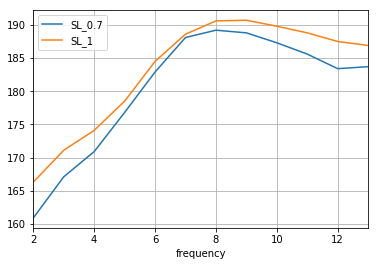

In [3]:
M.plot()
plt.grid()

Text(0, 0.5, '[dB]')

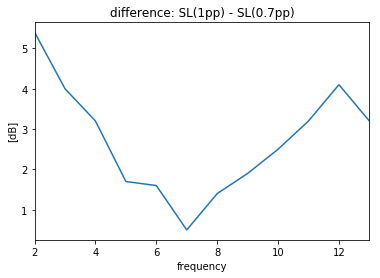

In [7]:
ax=plt.subplot(111)
(M['SL_1']-M['SL_0.7']).plot(ax=ax)
ax.set_title('difference: SL(1pp) - SL(0.7pp)')
ax.set_ylabel('[dB]')

## translate into reception levels as a function of range and frequency

$RL=SL-TL+NL+PG$

Transmission loss:
$TL=20\log(r)+\alpha(r)$

Uses Thorpe 1067 model for the absorption coefficient:

$\alpha=f^2 \times \Big [ \frac{0.11}{1+f^2} +\frac{44}{4100+f^2} \Big ]$

where f is in kHz and $\alpha$ is in dB/km

$NL=NL1K-17log(f)+10log(B)$ avec $NL1K=66.5dB$ (seastate 4, table 4.2) et $B=200$Hz and $f$ is in kHz

$PG=10log(BT)$, avec $T=1$ second


In [8]:
B=200 # bandwidth Hz
T=1 # signal length in seconds

alpha = (lambda f: f**2 * (.11/(1+f**2) + 44/(4100+f**2)))

r = pd.DataFrame({'range':np.arange(1,100)*1e3}).set_index('range')
ds = xr.merge([xr.Dataset.from_dataframe(M), xr.Dataset.from_dataframe(r)])

ds['TL'] = 20*np.log10(ds.range) + alpha(ds.frequency)*ds.range/1e3

ds['NL'] = 66.5 - 17*np.log(ds.frequency) + 10*np.log(B)

ds['PG'] = 10*np.log(B*T)

ds['RL_0.7'] = ds['SL_0.7'] - ds.TL - ds.NL + ds.PG
ds['RL_1'] = ds['SL_1'] - ds.TL - ds.NL + ds.PG


---

### TL 

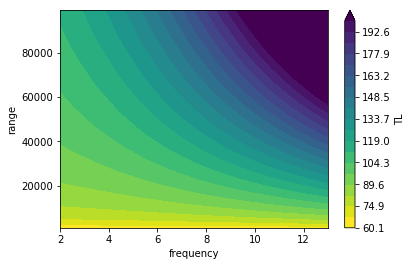

In [9]:
ds['TL'].plot.contourf(vmax=200,levels=20,cmap='viridis_r')

---

### RL for a peak amplitude of 0.7

colors are saturated below 8dB


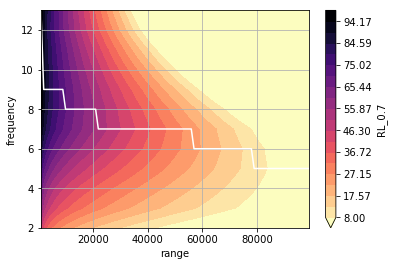

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['RL_0.7'].plot.contourf(vmin=8,levels=20,cmap='magma_r',ax=ax)
ds.frequency[ds['RL_0.7'].argmax(dim='frequency')].plot(ax=ax,color='w')
plt.grid()

---

### RL for a peak amplitude of 1.

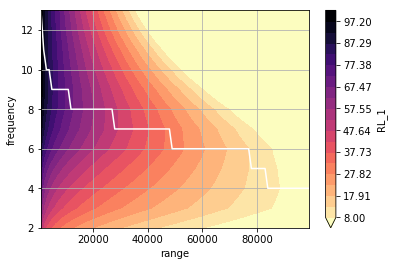

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ds['RL_1'].plot.contourf(vmin=8,levels=20,cmap='magma_r',ax=ax)
ds.frequency[ds['RL_1'].argmax(dim='frequency')].plot(ax=ax,color='w')
plt.grid()